In [127]:
import pandas as pd
df=pd.DataFrame()

In [130]:
df = pd.read_csv('C:/Users/sample.csv')


In [131]:
df.tail()

,Date,Quantity
237,44799.0,3872
238,44800.0,3557
239,44801.0,3192
240,44802.0,3912
241,44803.0,4020


In [137]:
df['Quantity_LastMonth']=df['Quantity'].shift(+1)
df['Quantity_2Monthsback']=df['Quantity'].shift(+2)
df['Quantity_3Monthsback']=df['Quantity'].shift(+3)
df

,Date,Quantity,Quantity_LastMonth,Quantity_2Monthsback,Quantity_3Monthsback
0,44562.0,2469,NaN,NaN,NaN
1,44563.0,2082,2469.0,NaN,NaN
2,44564.0,3047,2082.0,2469.0,NaN
3,44565.0,3121,3047.0,2082.0,2469.0
4,44566.0,2851,3121.0,3047.0,2082.0
...,...,...,...,...,...
237,44799.0,3872,3819.0,3473.0,4384.0
238,44800.0,3557,3872.0,3819.0,3473.0
239,44801.0,3192,3557.0,3872.0,3819.0
240,44802.0,3912,3192.0,3557.0,3872.0


In [138]:
df=df.dropna()
df

,Date,Quantity,Quantity_LastMonth,Quantity_2Monthsback,Quantity_3Monthsback
3,44565.0,3121,3047.0,2082.0,2469.0
4,44566.0,2851,3121.0,3047.0,2082.0
5,44567.0,3006,2851.0,3121.0,3047.0
6,44568.0,2467,3006.0,2851.0,3121.0
7,44569.0,2442,2467.0,3006.0,2851.0
...,...,...,...,...,...
237,44799.0,3872,3819.0,3473.0,4384.0
238,44800.0,3557,3872.0,3819.0,3473.0
239,44801.0,3192,3557.0,3872.0,3819.0
240,44802.0,3912,3192.0,3557.0,3872.0


In [139]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [140]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)


In [142]:
import numpy as np
x1,x2,x3,y=df['Quantity_LastMonth'],df['Quantity_2Monthsback'],df['Quantity_3Monthsback'],df['Quantity']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[ 3047.  2082.  2469.]
 [ 3121.  3047.  2082.]
 [ 2851.  3121.  3047.]
 [ 3006.  2851.  3121.]
 [ 2467.  3006.  2851.]
 [ 2442.  2467.  3006.]
 [ 2288.  2442.  2467.]
 [ 2818.  2288.  2442.]
 [ 3131.  2818.  2288.]
 [ 3177.  3131.  2818.]
 [ 2746.  3177.  3131.]
 [ 3348.  2746.  3177.]
 [ 3047.  3348.  2746.]
 [ 2292.  3047.  3348.]
 [ 3130.  2292.  3047.]
 [ 3004.  3130.  2292.]
 [ 3889.  3004.  3130.]
 [ 3359.  3889.  3004.]
 [ 3177.  3359.  3889.]
 [ 3344.  3177.  3359.]
 [ 2376.  3344.  3177.]
 [ 4393.  2376.  3344.]
 [ 3648.  4393.  2376.]
 [ 3631.  3648.  4393.]
 [ 4184.  3631.  3648.]
 [ 4768.  4184.  3631.]
 [10730.  4768.  4184.]
 [ 7081. 10730.  4768.]
 [ 6549.  7081. 10730.]
 [ 4323.  6549.  7081.]
 [ 4582.  4323.  6549.]
 [ 4093.  4582.  4323.]
 [ 3529.  4093.  4582.]
 [ 3124.  3529.  4093.]
 [ 2779.  3124.  3529.]
 [ 5210.  2779.  3124.]
 [ 5226.  5210.  2779.]
 [ 4962.  5226.  5210.]
 [ 4029.  4962.  5226.]
 [ 5456.  4029.  4962.]
 [ 3944.  5456.  4029.]
 [ 3427.  3944. 

In [143]:
X_train,X_test,y_train,y_test=final_x[:-100],final_x[-100:],y[:-100],y[-100:]

In [144]:
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

<ipython-input-144-293373e02e7d>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


LinearRegression()

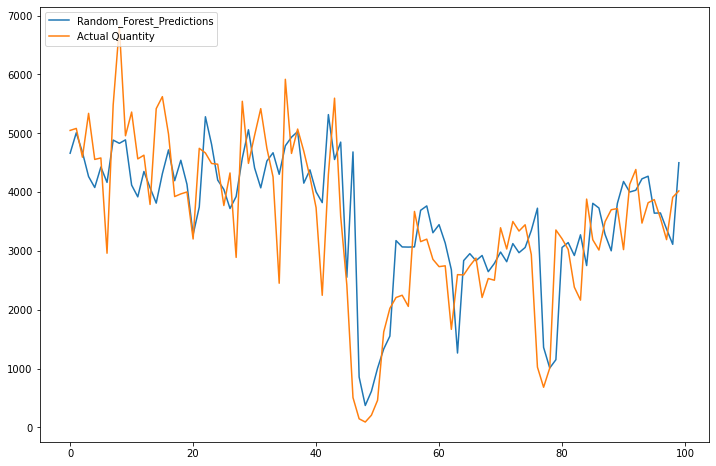

In [145]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Quantity')
plt.legend(loc="upper left")
plt.show()

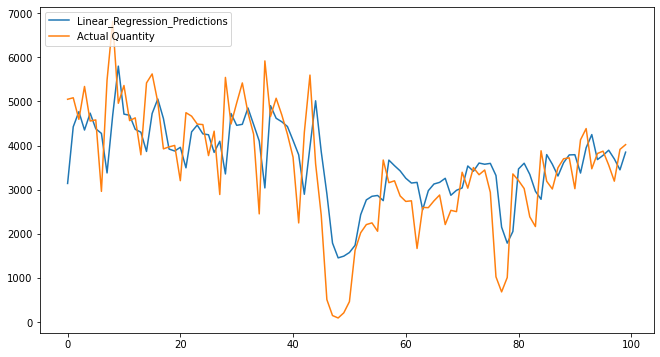

In [146]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Quantity')
plt.legend(loc="upper left")
plt.show()

In [147]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [148]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 893.8705572352184
Mean Squared Error for Linear Regression Model is: 957.7170374067034
